In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Brazilian Immigrant Population Analysis

In [2]:
year_2005 = pd.read_excel('Brazilian Immigrants 2005.xlsx')
year_2006 = pd.read_excel('Brazilian Immigrants 2006.xlsx')
year_2007 = pd.read_excel('Brazilian Immigrants 2007.xlsx')
year_2008 = pd.read_excel('Brazilian Immigrants 2008.xlsx')
year_2009 = pd.read_excel('Brazilian Immigrants 2009.xlsx')
year_2010 = pd.read_excel('Brazilian Immigrants 2010.xlsx')
year_2011 = pd.read_excel('Brazilian Immigrants 2011.xlsx')

year_tuple = (year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011)
years = [2005, 2006, 2007, 2008, 2009, 2010, 2011]

In [3]:
year_2005

,Type,State Code,1.0,2.0,4.0,5.0,6.0,8.0,9.0,10.0,...,41.0,42.0,44.0,45.0,47.0,48.0,49.0,51.0,53.0,55.0
0,Population,Population,2030.0,88.0,1288.0,861.0,25111.0,1339.0,14021.0,296.0,...,571.0,7019.0,1143.0,2339.0,1355.0,7921.0,2904.0,6471.0,2505.0,804.0
1,Age,Age 0 to 4,78.0,0.0,0.0,0.0,305.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,20.0,0.0,87.0,0.0,0.0
2,Age,Age 05 to 09,172.0,0.0,0.0,116.0,1039.0,84.0,333.0,0.0,...,0.0,157.0,0.0,0.0,0.0,283.0,182.0,1180.0,0.0,85.0
3,Age,Age 10 to 19,242.0,0.0,0.0,0.0,2920.0,0.0,1309.0,0.0,...,0.0,748.0,0.0,119.0,0.0,382.0,360.0,439.0,467.0,213.0
4,Age,Age 20 to 24,0.0,0.0,67.0,0.0,1910.0,0.0,2153.0,104.0,...,120.0,795.0,75.0,577.0,0.0,831.0,154.0,394.0,97.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Poverty Status,Individuals Below Poverty,0.0,0.0,419.0,0.0,3044.0,474.0,1768.0,104.0,...,200.0,1403.0,0.0,144.0,0.0,543.0,81.0,286.0,144.0,42.0
67,Poverty Status,Individuals Above Poverty,2030.0,88.0,869.0,861.0,22067.0,865.0,12253.0,192.0,...,371.0,5616.0,1143.0,2195.0,1355.0,7378.0,2823.0,6185.0,2361.0,762.0
68,Poverty Status,Not Determined,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,Median Personal Earnings,Median Personal Earnings,15000.0,50800.0,20000.0,50000.0,13000.0,8700.0,16000.0,5500.0,...,19000.0,10400.0,24000.0,22000.0,33000.0,15000.0,13200.0,11100.0,16800.0,0.0


In [4]:
male_count = []
female_count = []

for year in year_tuple:
    male_count.append(year[25][19])
    female_count.append(year[25][18])
    
print(male_count)
print(female_count)

[48207.0, 42170.0, 39875.0, 37934.0, 38999.0, 37401.0, 31259.0]
[40340.0, 33639.0, 28028.0, 33148.0, 30503.0, 35643.0, 31837.0]


In [5]:
# Graphs age distribution of a single year given the specific year dataframe and an int year (used for title)
def graph_age_range(year_data, year):
    ages = [year_data[25][age] for age in range(1, 18)]
    age_ranges = [year_data['State Code'][ranges] for ranges in range(1,18)]

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(age_ranges,ages)
    ax.set_ylim(0,18000)
    ax.set_ylabel('Number of Brazilians')
    ax.set_xlabel('Age Ranges')
    ax.set_title('Age Ranges for Brazilian Immigrant Population in Massachusetts for ' + year)
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='x-small')
    plt.show()
    
    return


# Graphs gender distribution of a single year given the specific year dataframe and an int year (used for title)
def graph_gender_distribution(year_data, year):
    genders = [year_data[25][gender] for gender in range(18, 20)]
    gender_ranges = [year_data['State Code'][ranges] for ranges in range(18,20)]

    total = year_data[25][0]
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(gender_ranges,genders, width = 0.5)
    ax.set_ylim(0,50000)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:.0%}'.format(height/total), (p.get_x()+.5*width, p.get_y() + height + 0.01), ha = 'center')
    
    ax.set_ylabel('Number of Brazilians')
    ax.set_xlabel('Gender')
    ax.set_title('Distribution of Genders for Brazilian Immigrant Population in Massachusetts for ' + year)
    plt.show()
    
    return

# Graphs the distribution of genders overtime 
def graph_gender_over_time(male_count, female_count, years):
    # data to plot
    n_groups = len(male_count)

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8

    plt.bar(index, male_count, bar_width,
        alpha=opacity,
        color='b',
        label='Men')

    plt.bar(index + bar_width, female_count, bar_width,
        alpha=opacity,
        color='r',
        label='Women')
    
    plt.xlabel('Years')
    plt.ylabel('Population')
    plt.title('Female and Male Brazilian Population in Massachusetts Over Time')
    plt.xticks(index + bar_width, years)
    plt.legend()

    plt.tight_layout()
    plt.show()


    return 

# Population

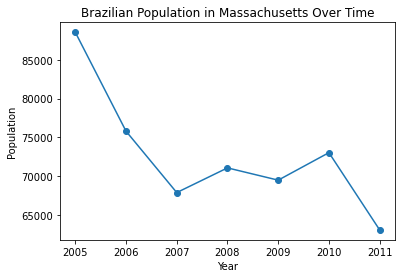

In [6]:
populations = [year_2005[25][0],year_2006[25][0], year_2007[25][0], year_2008[25][0], year_2009[25][0],
              year_2010[25][0], year_2011[25][0]]

plt.plot(years, populations, marker='o')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Brazilian Population in Massachusetts Over Time')
plt.show()

# Age

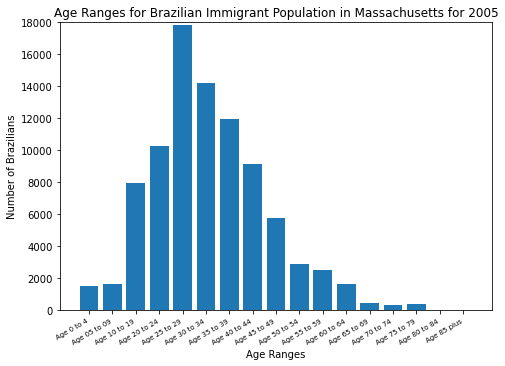

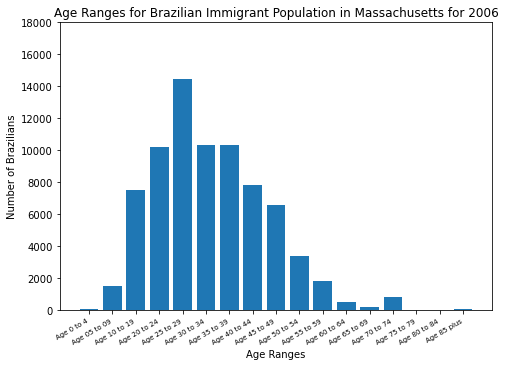

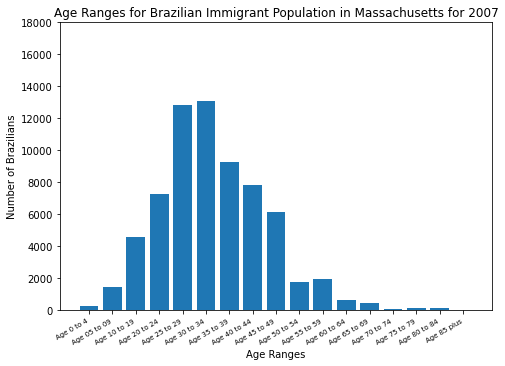

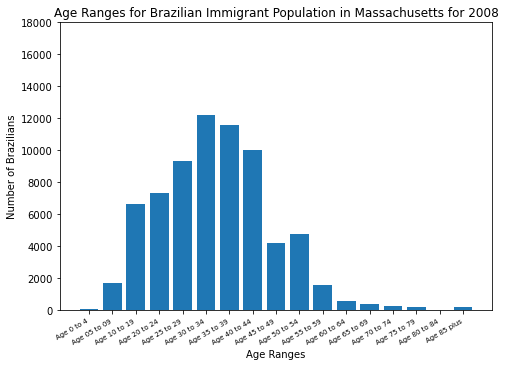

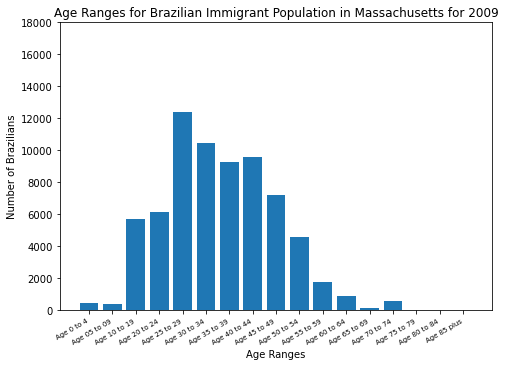

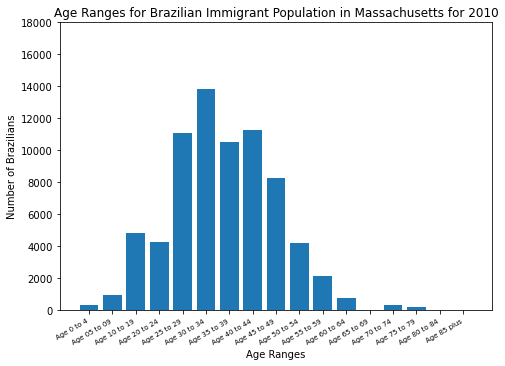

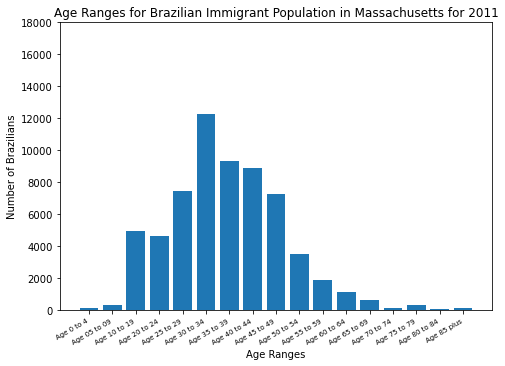

In [7]:
graph_age_range(year_2005, '2005')
graph_age_range(year_2006, '2006')
graph_age_range(year_2007, '2007')
graph_age_range(year_2008, '2008')
graph_age_range(year_2009, '2009')
graph_age_range(year_2010, '2010')
graph_age_range(year_2011, '2011')

# Gender

Male/Female Brazilian Population in Massachusetts by Year


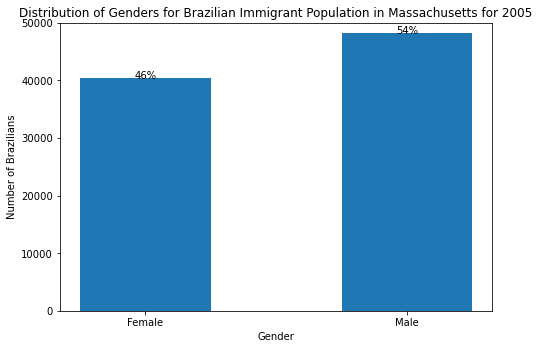

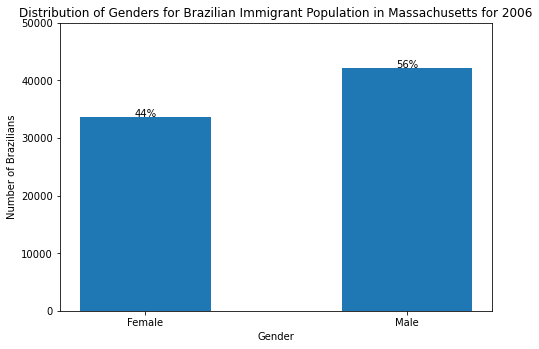

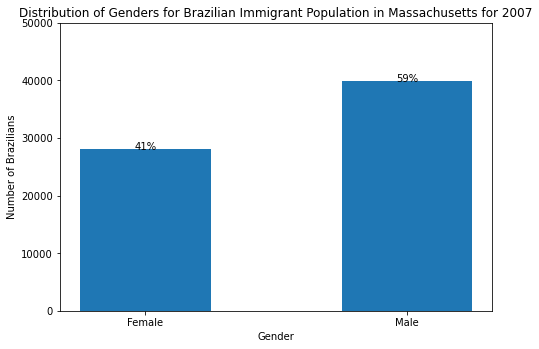

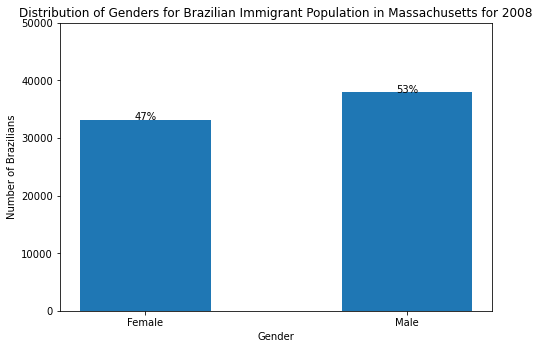

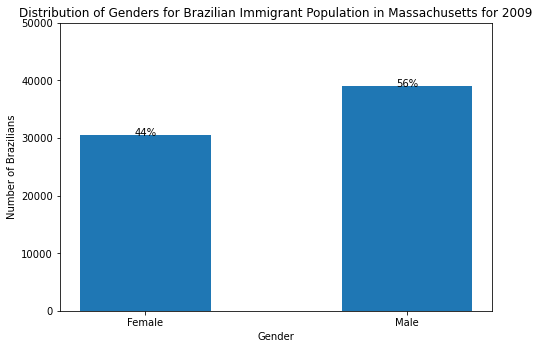

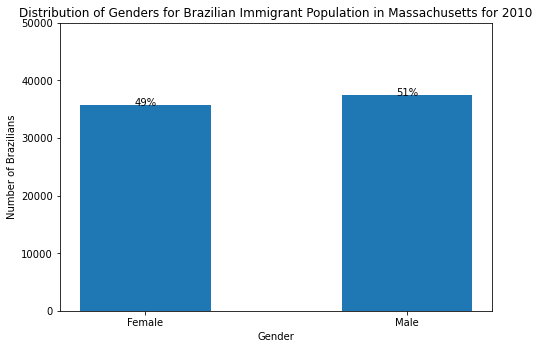

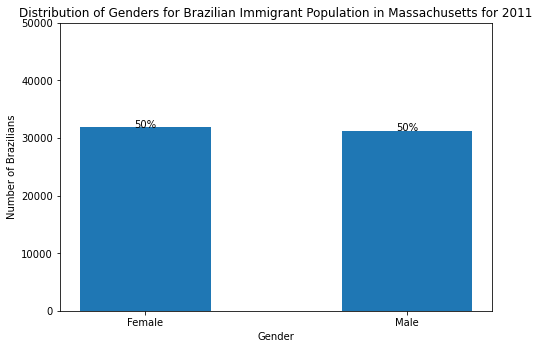

In [8]:
print("Male/Female Brazilian Population in Massachusetts by Year")

graph_gender_distribution(year_2005, '2005')
graph_gender_distribution(year_2006, '2006')
graph_gender_distribution(year_2007, '2007')
graph_gender_distribution(year_2008, '2008')
graph_gender_distribution(year_2009, '2009')
graph_gender_distribution(year_2010, '2010')
graph_gender_distribution(year_2011, '2011')

Male/Female Brazilian Population in Massachusetts Over Time


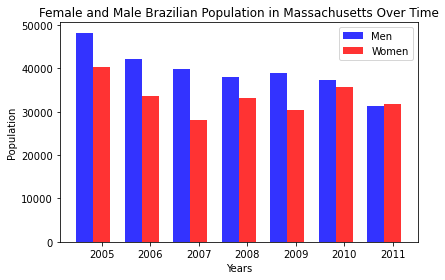

In [9]:
print("Male/Female Brazilian Population in Massachusetts Over Time")
graph_gender_over_time(male_count, female_count, years)

# Employment

In [40]:
# Graphs age distribution of a single year given the specific year dataframe and an int year (used for title)
def graph_employment_industry_range(year_data, year):
    industry = [year_data[25][industry] for industry in range(42, 56)]
    industry_types = [year_data['State Code'][types] for types in range(42, 56)]

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(industry_types,industry)
    ax.set_ylim(0,18000)
    ax.set_ylabel('Number of Brazilians')
    ax.set_xlabel('Industry Types')
    ax.set_title('Industry Types for Brazilian Immigrant Population in Massachusetts for ' + year)
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='x-small')
    plt.show()
    
    return

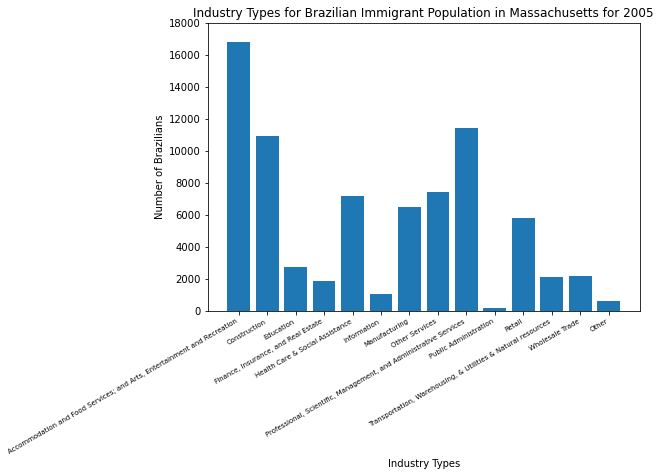

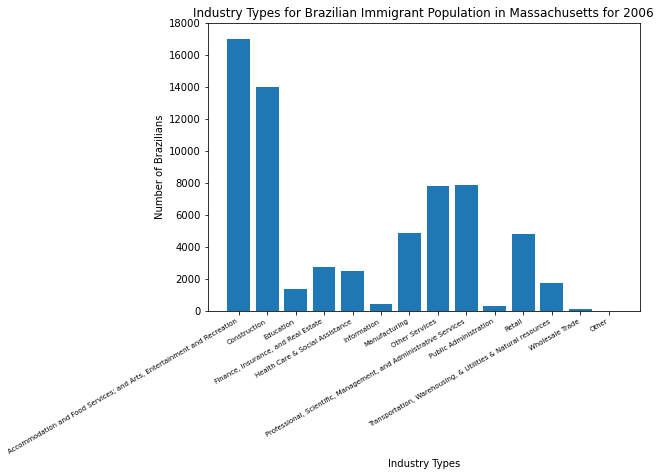

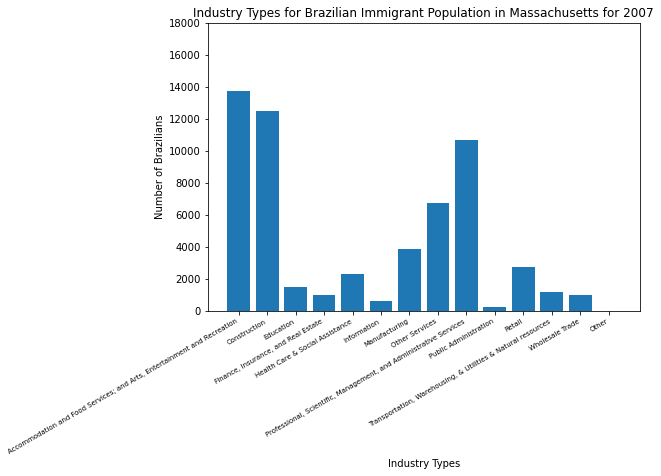

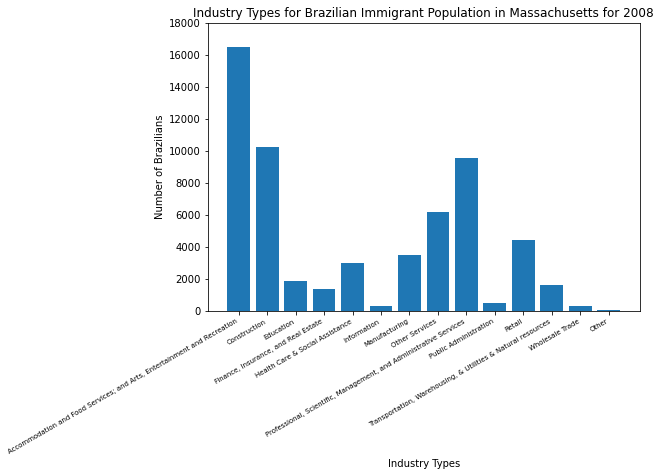

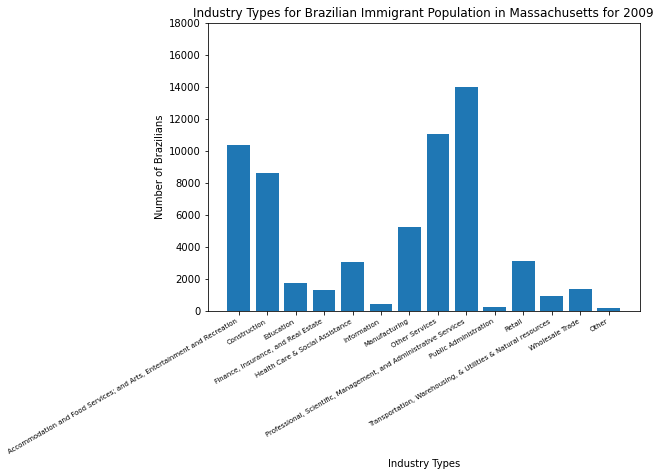

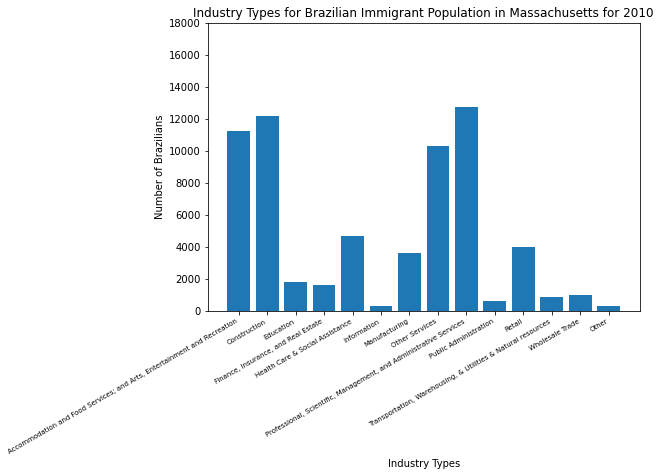

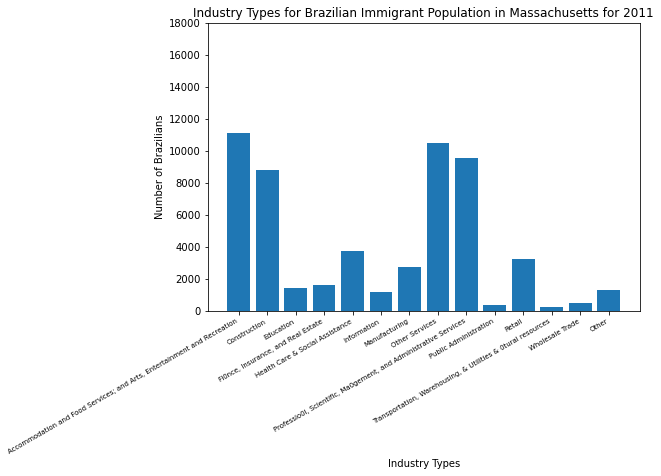

In [41]:
graph_employment_industry_range(year_2005, '2005')
graph_employment_industry_range(year_2006, '2006')
graph_employment_industry_range(year_2007, '2007')
graph_employment_industry_range(year_2008, '2008')
graph_employment_industry_range(year_2009, '2009')
graph_employment_industry_range(year_2010, '2010')
graph_employment_industry_range(year_2011, '2011')

In [55]:
# Graphs age distribution of a single year given the specific year dataframe and an int year (used for title)
def graph_employment_occupation_range(year_data, year):
    occupation = [year_data[25][occupation] for occupation in range(56, 66)]
    occupation_types = [year_data['State Code'][types] for types in range(56, 66)]

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(occupation_types,occupation)
    print(occupation)
    ax.set_ylim(0,18000)
    ax.set_ylabel('Number of Brazilians')
    ax.set_xlabel('Occupation Types')
    ax.set_title('Occupation Types for Brazilian Immigrant Population in Massachusetts for ' + year)
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='x-small')
    plt.show()
    
    return

[16245.0, 35904.0, 10976.0, 10546.0, 641.0, 10366.0, 732.0, 369.0, 2160.0, 608.0]


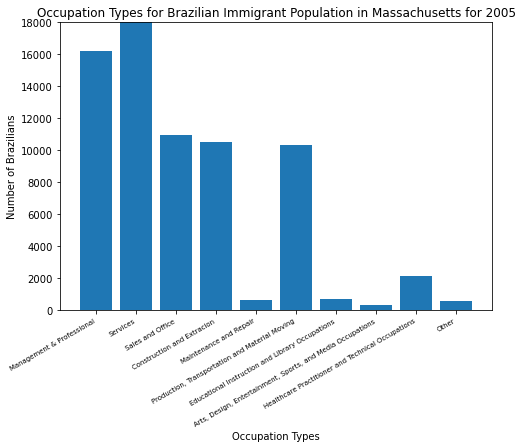

[15329.0, 27410.0, 9058.0, 12810.0, 1116.0, 8342.0, 491.0, 868.0, 170.0, 215.0]


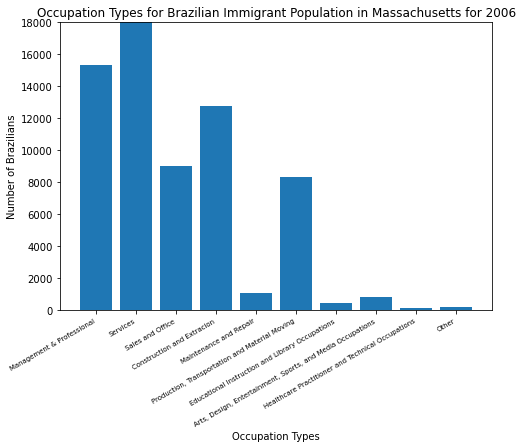

[3673.0, 28507.0, 5799.0, 11357.0, 616.0, 6232.0, 1014.0, 172.0, 350.0, 202.0]


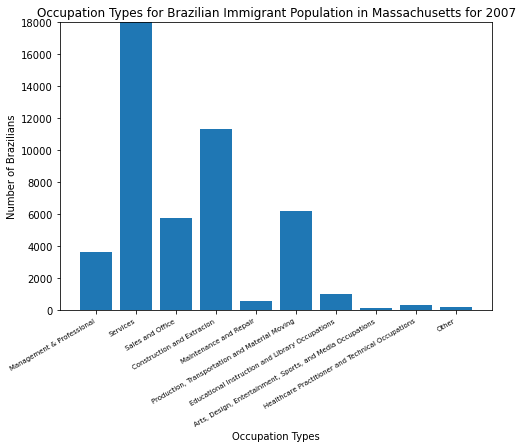

[17546.0, 29783.0, 6188.0, 10184.0, 979.0, 4854.0, 901.0, 432.0, 162.0, 53.0]


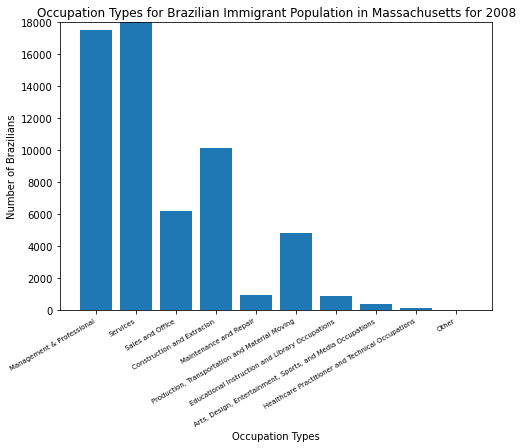

[11526.0, 30651.0, 7753.0, 8712.0, 1674.0, 6614.0, 451.0, 742.0, 511.0, 393.0]


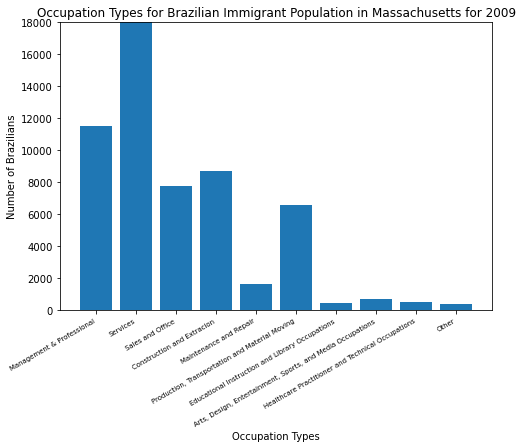

[11857.0, 31956.0, 8177.0, 11532.0, 1686.0, 5341.0, 822.0, 489.0, 783.0, 317.0]


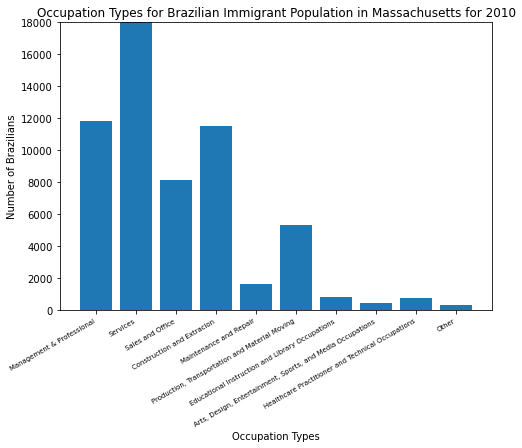

[11593.0, 27664.0, 5727.0, 8428.0, 1488.0, 4348.0, 785.0, 492.0, 1302.0, 1269.0]


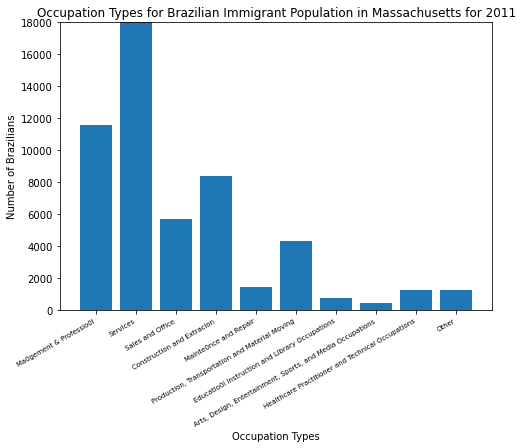

In [56]:
graph_employment_occupation_range(year_2005, '2005')
graph_employment_occupation_range(year_2006, '2006')
graph_employment_occupation_range(year_2007, '2007')
graph_employment_occupation_range(year_2008, '2008')
graph_employment_occupation_range(year_2009, '2009')
graph_employment_occupation_range(year_2010, '2010')
graph_employment_occupation_range(year_2011, '2011')